
-----
#### MS: Unique patterns of mutations in childhood cancer highlight chemotherapy’s disease-defining role at relapse
### Main Figure 4
-----

In [86]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as patches
import seaborn as sns

import os
import sys

set2_cols = sns.color_palette("Set2")

-----
##### Set up input / output directories

In [87]:
## Provide an output directory for figures or use 'installation_folder/figures' directory
root_dir = os.path.dirname(os.getcwd())
fig_out = os.path.join(root_dir, 'figures')
## Or provide a results path
#fig_out = '/Users/dir1/dir2/Figures'

-----
##### Load helper scripts

In [88]:
sys.path.append(str(root_dir))
import scripts.utils as ut

-----
##### Load & prepare data 

In [89]:
## Load patients metadata
kzm611_md = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_md.tsv'), sep='\t', index_col=0)
low_samples = kzm611_md[kzm611_md.Burden=='low'].index.tolist()

In [90]:
kzm611_sigs = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_signatures.tsv'), sep='\t', index_col=0)
kzm611_sigs_low = kzm611_sigs.loc[low_samples].copy()
kzm611_sigs.shape, kzm611_sigs_low.shape

((611, 69), (577, 69))

In [91]:
thr_nov_sigs = ['SBS11', 'SBS17b', 'SBS31', 'SBS35', 'SBS87', 'SBS288L2', 'SBS288L3', 'SBS288L4', 'SBS288L5', 'SBS288H5']
thr_nhm_nov_sigs = ['SBS11', 'SBS17b', 'SBS31', 'SBS35', 'SBS87', 'SBS288L2', 'SBS288L3', 'SBS288L4', 'SBS288L5']
cos_plat_sbs = ['SBS31', 'SBS35']
cos_plat_sigs = ['SBS31', 'SBS35', 'DBS5']
all_plat_sbs = ['SBS31', 'SBS35', 'SBS288L5']
all_plat_sigs = ['SBS31', 'SBS35', 'SBS288L5', 'DBS5', 'DBS78H2']

cos_plat_sigs = ['SBS31', 'SBS35', 'DBS5']
ncos_plat_sigs = ['DBS78H2', 'SBS288L5', 'DBS2', 'DBS6', 'ID3']
ncos1_plat_sigs = ['DBS78H2', 'SBS288L5', 'ID3']
ncos2_plat_sigs = ['DBS2', 'DBS6']
plat_enr_thr_sigs = ['SBS35', 'DBS78H2', 'SBS31', 'SBS288L5', 'DBS5', 'DBS2', 'DBS6', 'ID3']
plat_enr_thr_nonID = ['SBS35', 'DBS78H2', 'SBS31', 'SBS288L5', 'DBS5', 'DBS2', 'DBS6']
plat_enr_sbs = ['SBS35', 'SBS31', 'SBS288L5']
plat_enr_dbs = ['DBS78H2', 'DBS5', 'DBS2', 'DBS6']
plat_enr_id = ['ID3']


cos_plat_sbs = kzm611_sigs[['SBS31', 'SBS35']].copy()
cos_plat_all = kzm611_sigs[['SBS31', 'SBS35', 'DBS5']].copy()
all_plat_sigs = kzm611_sigs[plat_enr_thr_sigs].copy()
all_plat_sbs = kzm611_sigs[plat_enr_sbs].copy()
all_plat_dbs = kzm611_sigs[plat_enr_dbs].copy()
all_plat_id = kzm611_sigs[plat_enr_id].copy()

In [92]:
ncos_df = kzm611_sigs[ncos_plat_sigs].copy()
ncos_df['Total'] = ncos_df.sum(axis=1)

In [93]:
kzm_plat_df = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_plats_days_dose.txt'), sep='\t')
kzm_plat_df.head(2)

,Sample_id,Patient_id,Type,Days_from,Cisplatin_dose,Carboplatin_dose,Oxaliplatin_dose,Cisplatin,Carboplatin,Oxaliplatin
0,KiCS0002_321321,KiCS0002,GCT,858,500.0,4200.0,0,Y,Y,N
1,KiCS0006_274243,KiCS0006,NBL,1154,400.0,0.0,0,Y,N,N


In [83]:
kzm_plat_df.shape

(141, 10)

In [94]:
kzm_plat_df['SBS'] = [kzm611_md.loc[x, 'SBS'] for x in kzm_plat_df.Sample_id]

scaler = MinMaxScaler()
kzm_plat_df.Cisplatin_dose = scaler.fit_transform(kzm_plat_df.Cisplatin_dose.values.reshape(-1,1)).flatten()
kzm_plat_df.Carboplatin_dose = scaler.fit_transform(kzm_plat_df.Carboplatin_dose.values.reshape(-1,1)).flatten()
kzm_plat_df.Oxaliplatin_dose = scaler.fit_transform(kzm_plat_df.Oxaliplatin_dose.values.reshape(-1,1)).flatten()

kzm_plat_df['Size'] = ((kzm_plat_df.Cisplatin_dose+kzm_plat_df.Carboplatin_dose+kzm_plat_df.Oxaliplatin_dose)/2) * 2000
#kzm_plat_df['Size'] = 500
kzm_plat_df['Days_log'] = np.log10(kzm_plat_df.Days_from+0.00000000001)
kzm_plat_df['SBS_log'] = np.log10(kzm_plat_df.SBS+0.00000000001)

kzm_plat_df.shape

(141, 14)

In [20]:
kzm_plat_df.head()

,Sample_id,Patient_id,Type,Days_from,Cisplatin_dose,Carboplatin_dose,Oxaliplatin_dose,Cisplatin,Carboplatin,Oxaliplatin,SBS,Size,Days_log,SBS_log
0,KiCS0002_321321,KiCS0002,GCT,858,0.198413,0.636364,0.000000,Y,Y,N,15207,834.776335,2.933487,4.182044
1,KiCS0006_274243,KiCS0006,NBL,1154,0.158730,0.000000,0.000000,Y,N,N,3842,158.730159,3.062206,3.584557
2,KiCS0008_289185,KiCS0008,CRC,616,0.000000,0.000000,0.542986,N,N,Y,17184,542.986425,2.789581,4.235124
3,KiCS0010_270645,KiCS0010,OST,3,0.047619,0.000000,0.000000,Y,N,N,6761,47.619048,0.477121,3.830011
4,KiCS0010_270646,KiCS0010,OST,75,0.095238,0.000000,0.000000,Y,N,N,251,95.238095,1.875061,2.399674


In [95]:
all_plat_sigs_df = kzm_plat_df.copy()

all_plat_sigs_df['Platin_sig'] = ['Y' if x in all_plat_sigs.loc[(all_plat_sigs > 0).sum(axis=1) > 0, :].index.tolist() else 'N' for x in all_plat_sigs_df.Sample_id]
all_plat_sigs_df['Platin_sbs'] = ['Y' if x in all_plat_sbs.loc[(all_plat_sbs > 0).sum(axis=1) > 0, :].index.tolist() else 'N' for x in all_plat_sigs_df.Sample_id]
all_plat_sigs_df['Platin_dbs'] = ['Y' if x in all_plat_dbs.loc[(all_plat_dbs > 0).sum(axis=1) > 0, :].index.tolist() else 'N' for x in all_plat_sigs_df.Sample_id]
all_plat_sigs_df['Platin_id'] = ['Y' if x in all_plat_id.loc[(all_plat_id > 0).sum(axis=1) > 0, :].index.tolist() else 'N' for x in all_plat_sigs_df.Sample_id]


all_plat_sigs_df.rename(columns={'Type': 'Tumor'}, inplace=True)
all_plat_sigs_df['Total_drugs'] = all_plat_sigs_df.Cisplatin + all_plat_sigs_df.Carboplatin + all_plat_sigs_df.Oxaliplatin

all_plat_sigs_df['cos_total'] = [all_plat_sigs.loc[x, cos_plat_sigs].sum() for x in all_plat_sigs_df.Sample_id]
all_plat_sigs_df['nonCos_total'] = [all_plat_sigs.loc[x, ncos_plat_sigs].sum() for x in all_plat_sigs_df.Sample_id]

all_plat_sigs_df.tail(2)

,Sample_id,Patient_id,Tumor,Days_from,Cisplatin_dose,Carboplatin_dose,Oxaliplatin_dose,Cisplatin,Carboplatin,Oxaliplatin,...,Size,Days_log,SBS_log,Platin_sig,Platin_sbs,Platin_dbs,Platin_id,Total_drugs,cos_total,nonCos_total
139,IID_H156418_T01_01_WG01,IID_H156418_T01,NBL,657,0.0,0.0,0.0,N,Y,N,...,0.0,2.817565,3.162564,Y,Y,N,N,NYN,262.0,255.0
140,IID_H158493_T01_01_WG01,IID_H158493_T01,OST,120,0.0,0.0,0.0,Y,N,N,...,0.0,2.079181,3.702172,Y,Y,Y,N,YNN,0.0,1258.0


In [26]:
topQuad = all_plat_sigs_df[(all_plat_sigs_df.SBS>1453) & (all_plat_sigs_df.Days_from>90)]
topQuad.to_csv(os.path.join(root_dir, 'source_data/KZM_topRightQuad.tsv'), sep='\t', index=None)

In [70]:
topr_quad = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_topRightQuad.tsv'), sep='\t', index_col=0)
topr_quad2 = pd.read_csv('/Users/mehdi/Documents/MyRepos/KiCS/data/KZM611_topRight_quad_v2.tsv', sep='\t', index_col=0)
topr_quad.Platin_sig.value_counts(), topr_quad2.Platin_sig.value_counts()

(Platin_sig
 Y    81
 N    30
 Name: count, dtype: int64,
 Platin_sig
 Y    70
 N    41
 Name: count, dtype: int64)

In [41]:
all_plat_md = all_plat_sigs_df.copy().set_index('Sample_id')
all_plat_md['Thre_State'] = [kzm611_md.loc[x, 'Thr_State'] for x in all_plat_md.index]
all_plat_md.to_csv(os.path.join(root_dir, 'source_data/KiCS_plat_state.tsv'), sep='\t')

-----------
## Panel a

(141, 22)



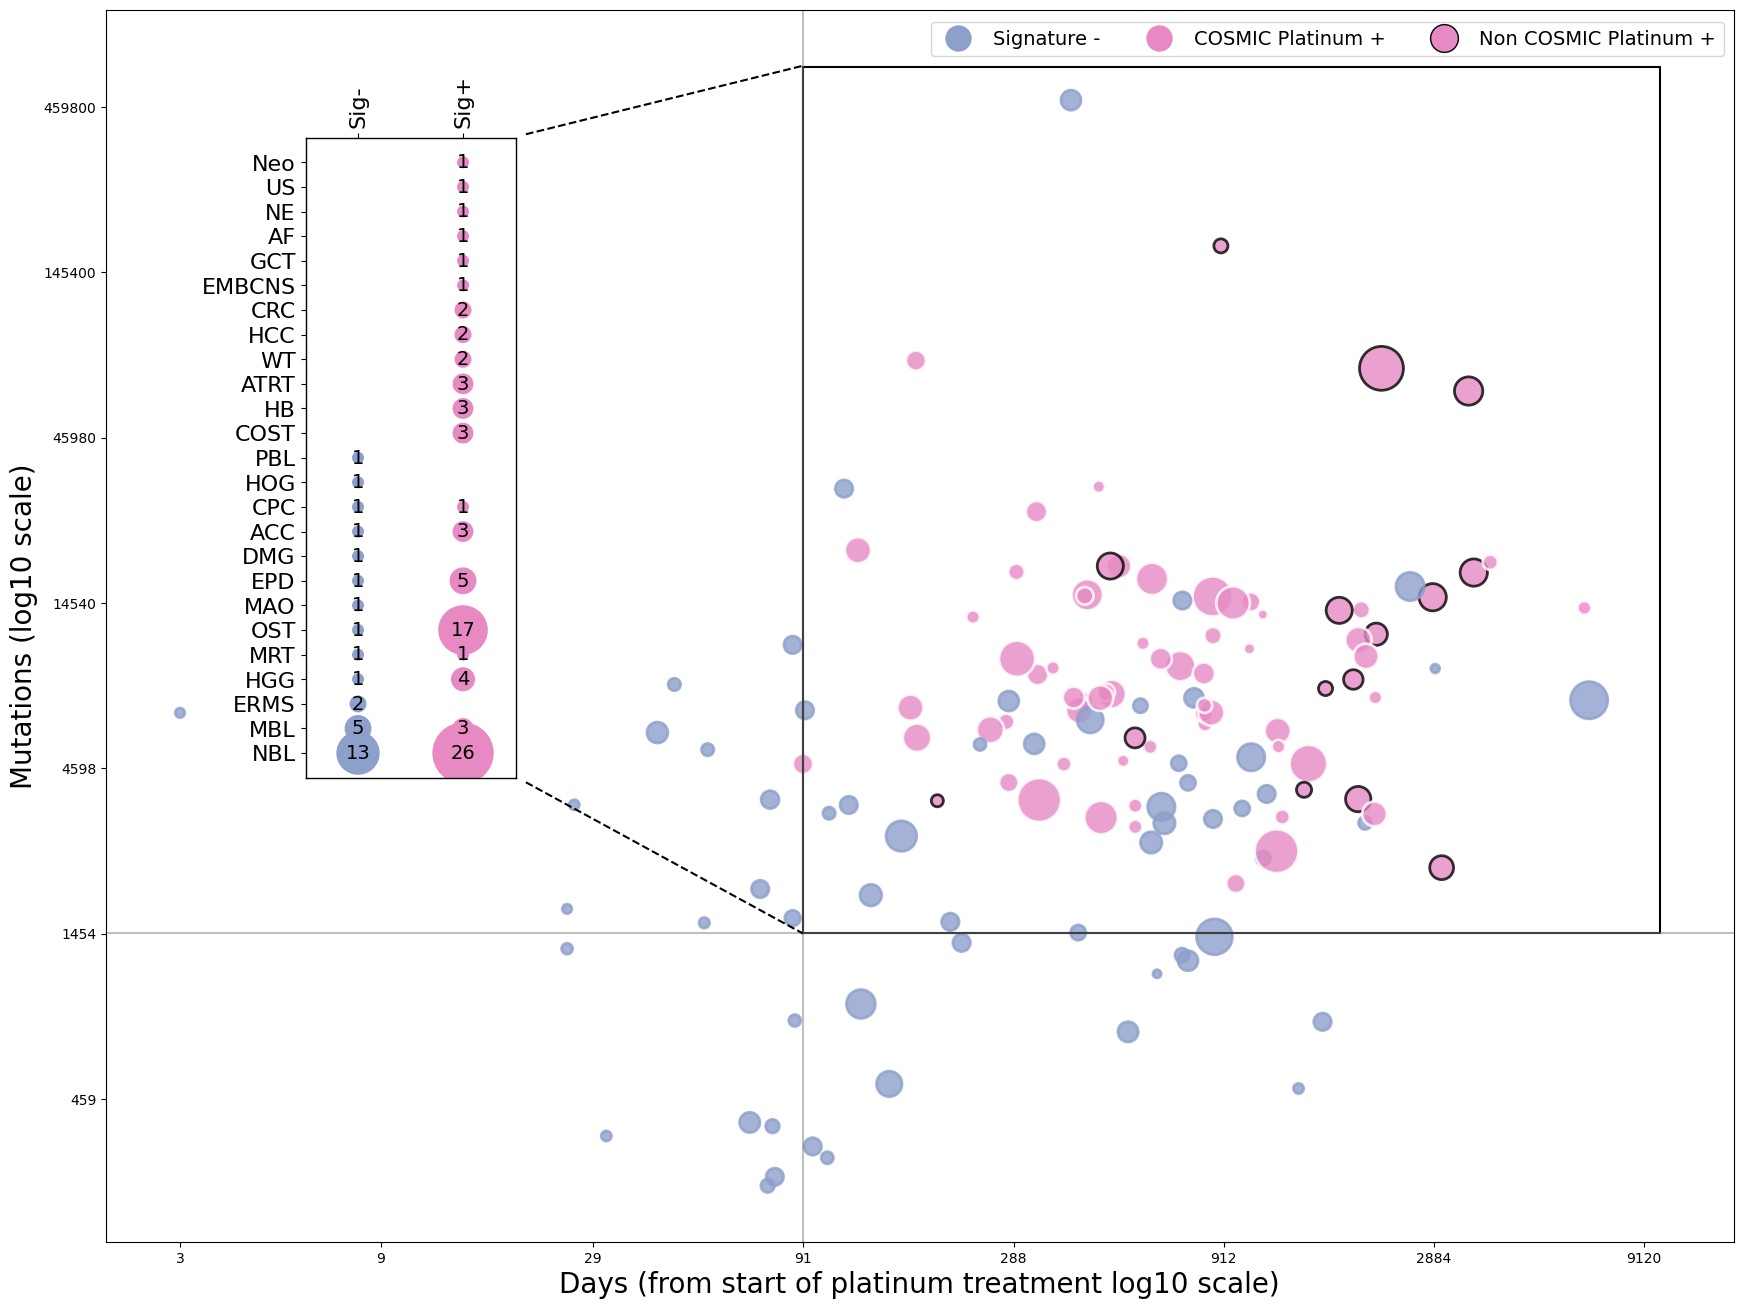

In [96]:
pcols = []

plat_df2plot = all_plat_sigs_df[all_plat_sigs_df.Total_drugs != 'NNN'].copy()
plat_df2plot['color'] = [set2_cols[2] if x=='N' else set2_cols[3] for x in plat_df2plot.Platin_sig]

for r in range(plat_df2plot.shape[0]):
    if plat_df2plot.cos_total.iloc[r] > 0:
        pcols.append('white')
    elif plat_df2plot.nonCos_total.iloc[r] > 0:
        pcols.append('black')
    else:
        pcols.append(set2_cols[2])


f, ax = plt.subplots(figsize=(21,16))

ax.scatter(plat_df2plot.Days_log, plat_df2plot.SBS_log,
                     c=plat_df2plot.color,
                     linewidth=2,
                     s=plat_df2plot.Size,
                     edgecolor=pcols,
                     alpha=0.8)


custom_lines = [Line2D([0], [0], color='white', marker='o', mfc=set2_cols[2], ms=20),
                Line2D([0], [0], color='white', marker='o', mfc=set2_cols[3], ms=20),
                Line2D([0], [0], color='white', marker='o', mfc=set2_cols[3], mec='black', ms=20)]
leg_labels = ['Signature -', 'COSMIC Platinum +', 'Non COSMIC Platinum +']
plt.legend(custom_lines, leg_labels, loc='upper right',
          bbox_to_anchor=(1,.998), ncol = 3, fontsize=14)

ax.set_xticks([0.477, 0.9542, 1.46, 1.96, 2.46, 2.96, 3.46, 3.96])
ax.set_xticklabels([3, 9, 29, 91, 288, 912, 2884, 9120])

ax.set_yticks([2.1625, 2.6625, 3.1625, 3.6625, 4.1625, 4.6625, 5.1625, 5.6625])
ax.set_yticklabels([145, 459, 1454, 4598, 14540, 45980, 145400, 459800])
#ax.set_facecolor('#f4f0eb')

x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
min_day = plat_df2plot[plat_df2plot.Platin_sig=='Y'].Days_log.min()
min_sbs = plat_df2plot[plat_df2plot.Platin_sig=='Y'].SBS_log.min()
max_sbs = plat_df2plot[plat_df2plot.Platin_sig=='Y'].SBS_log.max()

plt.axvline(min_day, color="gray", alpha=0.5)
plt.axhline(min_sbs, color="gray", alpha=0.5)

rect = patches.Rectangle((min_day, min_sbs), x_max-min_day, max_sbs/2, linewidth=1.5, edgecolor='black', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

def label_point(plot_df, ax):
    a = pd.concat({'x': plot_df.Days_log, 'y': plot_df.SBS_log, 'val': plot_df.Tumor, 'sig': plot_df.Platin_sig}, axis=1)
    p_count = 0
    for i, point in a.iterrows():
        if str(point['sig']) in ['N']:
            ax.text(point['x']+.02, point['y'], str(point['val']))
        p_count += 1

plt.ylabel('Mutations (log10 scale)', fontsize=20)
plt.xlabel('Days (from start of platinum treatment log10 scale)', fontsize=20)

type_sig_mlt = ut.get_type_numbers(plat_df2plot[(plat_df2plot.SBS_log>=min_sbs) & (plat_df2plot.Days_log>=min_day)].copy())

x1, y1 = [1.3, min_day], [3.62, min_sbs]
x2, y2 = [1.3, min_day], [5.58, y_max-0.06]
plt.plot(x1, y1, x2, y2, color='black', linestyle='--')

ax2 = f.add_axes([0.22,0.4, .1,.4])
plt.scatter(type_sig_mlt.Sig, type_sig_mlt.Tumor, edgecolors='k',
            s=type_sig_mlt.Count*75, c=type_sig_mlt.Color,
            zorder=2,
            linewidths=0)
for axis in ['top','bottom','left','right']:
    ax2.spines[axis].set_linewidth(1)
ax2.xaxis.tick_top()
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=16)
plt.xlim([-0.5, 1.5])
plt.ylim([-1, type_sig_mlt.shape[0]/2])
#ax2.set_facecolor('#f4f0eb')

for i, txt in enumerate(type_sig_mlt.Count):
    if txt != txt or txt==0:
        continue
    else:
        ax2.annotate(int(np.round(txt)), (type_sig_mlt.Sig[i], type_sig_mlt.Tumor[i]),
                    fontsize=14, ha='center', va='center')

print(plat_df2plot.shape)

print()
#plt.savefig(os.path.join(fig_out, 'Fig_4a.pdf'), bbox_inches="tight")

-----------
## Panel b

In [97]:
KZM_dates = pd.read_csv(os.path.join(root_dir, 'source_data/KZM_dates.tsv'), sep='\t', index_col=0)

In [98]:
gen_thr_sigs = ['SBS35', 'DBS78H2', 'SBS31', 'SBS288L5', 'DBS5', 'DBS2', 'DBS6', 'DBS4', 'ID8', 'SBS288L3', 'DBS9', 'ID3', 'SBS288L4', 'SBS288L2']
plat_enr_sigs = ['SBS35', 'DBS78H2', 'SBS31', 'SBS288L5', 'DBS5', 'DBS2', 'DBS6', 'ID3']

In [99]:
kzm611_gen_thr_sigs = kzm611_sigs[gen_thr_sigs].copy()
kzm611_gen_thr_sigs.head(3)

,SBS35,DBS78H2,SBS31,SBS288L5,DBS5,DBS2,DBS6,DBS4,ID8,SBS288L3,DBS9,ID3,SBS288L4,SBS288L2
I-H-108298-T1-1-D1-1,1868,0.0,0,0,60.0,80.0,0.0,0.0,0,0,0.0,0,0,0
I-H-108317-T1-1-D1-1,0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0,0
I-H-108319-T1-1-D1-1,2833,57.0,0,0,0.0,25.0,0.0,0.0,0,0,0.0,0,0,0


In [100]:
## Subset post-therapy samples
kzm611_gen_thr_sigs_v2 = kzm611_gen_thr_sigs.loc[[x for x in kzm611_gen_thr_sigs.index if x  in kzm611_md[kzm611_md.Therapy=='Post-Therapy'].index.tolist()]].copy()
kzm611_gen_thr_sigs_v2.shape

(349, 14)

In [101]:
KZM_dates_gen_thr = KZM_dates[KZM_dates.Days_from > 0].copy()
KZM_dates_gen_thr['Months'] = [np.ceil(x/30) for x in KZM_dates_gen_thr.Days_from]
KZM_dates_gen_thr['sigsYN'] = ['Y' if x in kzm611_gen_thr_sigs_v2.loc[(kzm611_gen_thr_sigs_v2 > 0).sum(axis=1) > 0, :].index.tolist() else 'N' for x in KZM_dates_gen_thr.index]
KZM_dates_gen_thr.head()

,Sample_date,Days_from,Months,sigsYN
KiCS0002_321321,2015-05-15,858.0,29.0,Y
KiCS0006_274243,2015-05-24,1198.0,40.0,N
KiCS0007_302948,2015-02-20,15.0,1.0,N
KiCS0008_289185,2016-07-06,762.0,26.0,Y
KiCS0010_270645,2014-04-01,3.0,1.0,N


In [102]:
gen_months_dict = {}
for mo in KZM_dates_gen_thr.Months.unique():
    subd = KZM_dates_gen_thr[KZM_dates_gen_thr.Months<=mo]
    
    if 'Y' in subd.sigsYN.tolist():
        gen_months_dict[mo] = subd.sigsYN.value_counts()['Y']/subd.shape[0]
    else:
        gen_months_dict[mo] = 0
months_gen_sigs_df = pd.DataFrame.from_dict(gen_months_dict, orient='index')
months_gen_sigs_df.columns = ['Patients_Percent']
months_gen_sigs_df['Months'] = months_gen_sigs_df.index.tolist()
months_gen_sigs_df.head(2)

,Patients_Percent,Months
29.0,0.235294,29.0
40.0,0.265060,40.0


In [103]:
all_plat_sigs_df_v2 = all_plat_sigs_df.copy()
all_plat_sigs_df_v2['Months'] = [np.ceil(x/30) for x in all_plat_sigs_df_v2.Days_from]
plat_months_dict = {}
for mo in all_plat_sigs_df_v2.Months.unique():
    subd = all_plat_sigs_df_v2[all_plat_sigs_df_v2.Months<=mo]
    if 'Y' in subd.Platin_sig.tolist():
        plat_months_dict[mo] = subd.Platin_sig.value_counts()['Y']/subd.shape[0]
    else:
        plat_months_dict[mo] = 0
months_plat_sigs_df = pd.DataFrame.from_dict(plat_months_dict, orient='index')
months_plat_sigs_df.columns = ['Patients_Percent']
months_plat_sigs_df['Months'] = months_plat_sigs_df.index.tolist()
months_plat_sigs_df.head(2)

,Patients_Percent,Months
29.0,0.504950,29.0
39.0,0.513514,39.0


In [104]:
antimets_dates = pd.read_csv(os.path.join(root_dir, 'source_data/KiCS_antimetabolites.tsv'), sep='\t', index_col=0)
anthra_dates = pd.read_csv(os.path.join(root_dir, 'source_data/KiCS_anthracyclines.tsv'), sep='\t', index_col=0)

anthra_dates = anthra_dates[anthra_dates.Days_from > 0].copy()
anthra_dates['Months'] = [np.ceil(x/30) for x in anthra_dates.Days_from]

antimets_dates = antimets_dates[antimets_dates.Days_from > 0].copy()
antimets_dates['Months'] = [np.ceil(x/30) for x in antimets_dates.Days_from]
anthra_dates.shape, antimets_dates.shape

((82, 7), (31, 7))

In [105]:
anthra_dates['sigsYN'] = ['Y' if x in kzm611_gen_thr_sigs_v2.loc[(kzm611_gen_thr_sigs_v2 > 0).sum(axis=1) > 0, :].index.tolist() else 'N' for x in anthra_dates.index]
antimets_dates['sigsYN'] = ['Y' if x in kzm611_gen_thr_sigs_v2.loc[(kzm611_gen_thr_sigs_v2 > 0).sum(axis=1) > 0, :].index.tolist() else 'N' for x in antimets_dates.index]

In [106]:
anthra_months_dict = {}
for mo in anthra_dates.Months.unique():
    subd = anthra_dates[anthra_dates.Months<=mo]
    if 'Y' in subd.sigsYN.tolist():
        anthra_months_dict[mo] = subd.sigsYN.value_counts()['Y']/subd.shape[0]
    else:
        anthra_months_dict[mo] = 0
anthra_months_sigs = pd.DataFrame.from_dict(anthra_months_dict, orient='index')
anthra_months_sigs.columns = ['Patients_Percent']
anthra_months_sigs['Months'] = anthra_months_sigs.index.tolist()
anthra_months_sigs.head(2)

,Patients_Percent,Months
38.0,0.4375,38.0
1.0,0.0000,1.0


In [107]:
antimets_months_dict = {}
for mo in antimets_dates.Months.unique():
    subd = antimets_dates[antimets_dates.Months<=mo]
    if 'Y' in subd.sigsYN.tolist():
        antimets_months_dict[mo] = subd.sigsYN.value_counts()['Y']/subd.shape[0]
    else:
        antimets_months_dict[mo] = 0
antimets_months_sigs = pd.DataFrame.from_dict(antimets_months_dict, orient='index')
antimets_months_sigs.columns = ['Patients_Percent']
antimets_months_sigs['Months'] = antimets_months_sigs.index.tolist()
antimets_months_sigs.head(2)

,Patients_Percent,Months
2.0,0.000000,2.0
10.0,0.214286,10.0


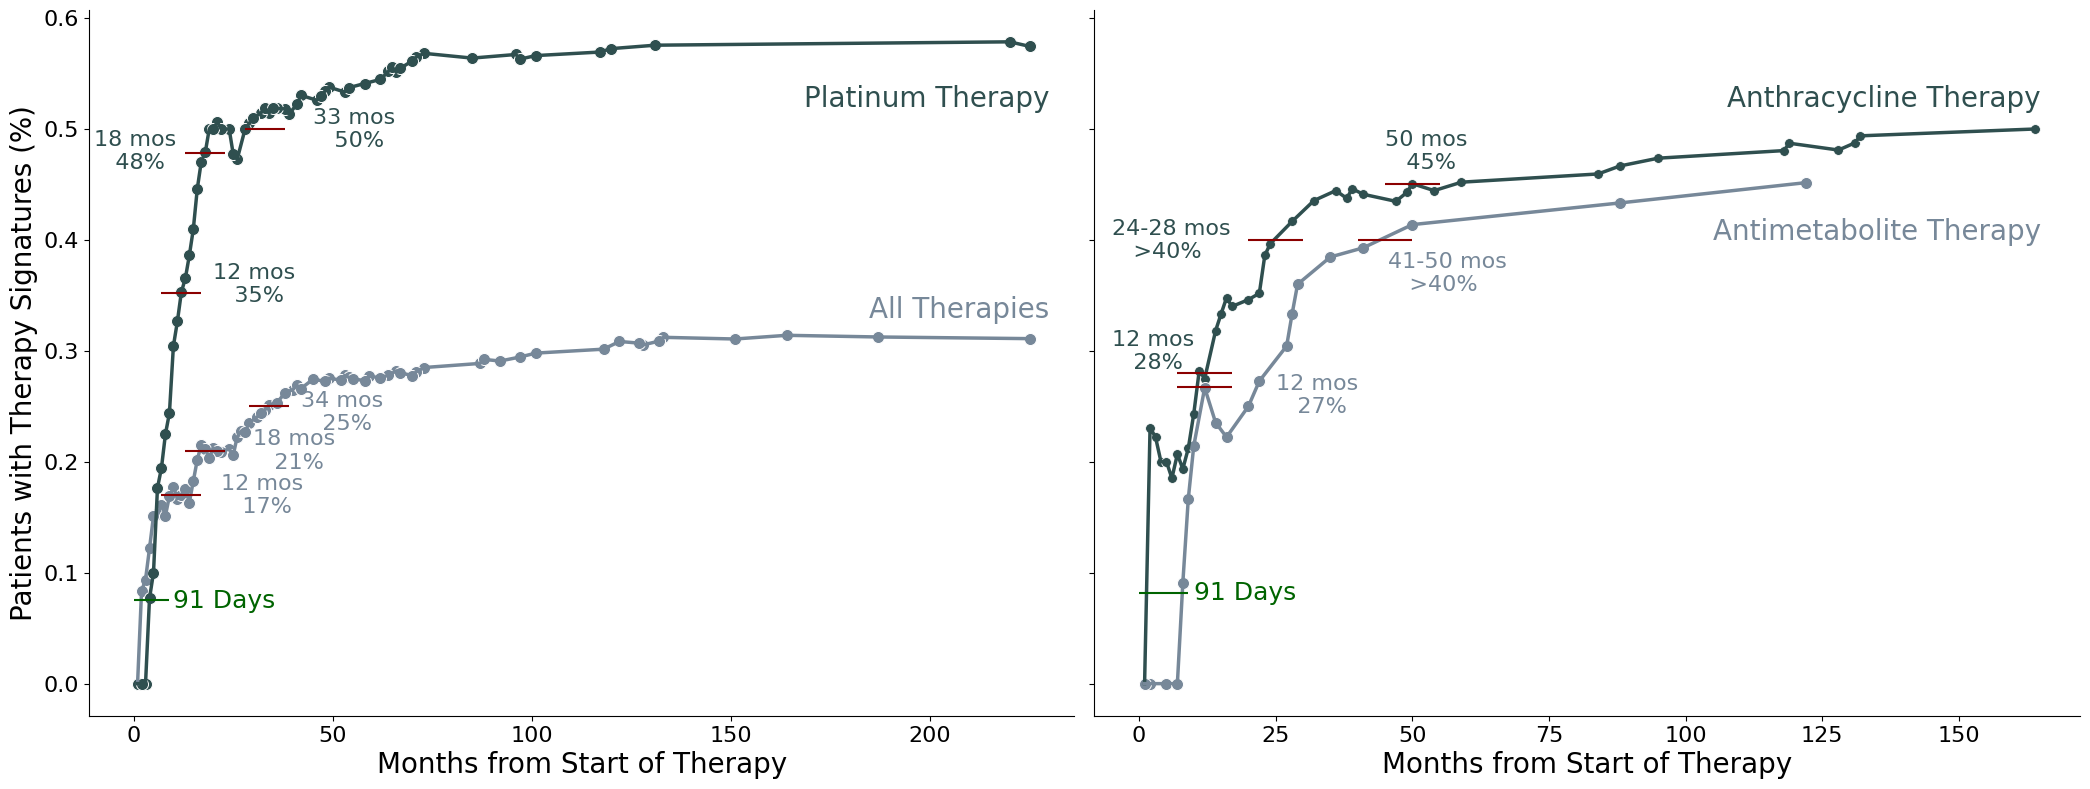

In [108]:
#fig, ax = plt.subplots(figsize=(12, 8))
fig, axes = plt.subplots(1,2, figsize=(21, 8), sharey=True, gridspec_kw={'width_ratios': [1, 1]})

ax1 = sns.lineplot(data=months_gen_sigs_df, x="Months", y="Patients_Percent", ax=axes[0], color='lightslategrey', linewidth=2.5)
ax1 = sns.scatterplot(data=months_gen_sigs_df, x="Months", y="Patients_Percent", ax=axes[0], color='lightslategrey', s=75)



ax2 = sns.lineplot(data=months_plat_sigs_df, x="Months", y="Patients_Percent", ax=axes[0], color='darkslategrey', linewidth=2.5)
ax2 = sns.scatterplot(data=months_plat_sigs_df, x="Months", y="Patients_Percent", ax=axes[0], color='darkslategrey', s=75)

#col = np.where(anthra_months_sigs.Months.isin([12,14, 15, 16]),'red','blue')

axes[0].set_xlabel('Months from Start of Therapy', fontsize=20)
axes[0].set_ylabel('Patients with Therapy Signatures (%)', fontsize=20)
plt.title('', fontsize=18)
axes[0].spines[['right', 'top']].set_visible(False)

axes[0].hlines(0.17, color='darkred', xmin=7, xmax=17)
axes[0].hlines(0.21, color='darkred', xmin=13, xmax=23)
axes[0].hlines(0.25, color='darkred', xmin=29, xmax=39)
#axes[0].hlines(0.27, color='darkred', xmin=40, xmax=50)
ax1.text(22, 0.17, '12 mos\n   17%', va='center', color='lightslategrey', fontsize=16)
ax1.text(30, 0.21, '18 mos\n   21%', va='center', color='lightslategrey', fontsize=16)
ax1.text(42, 0.245, '34 mos\n   25%', va='center', color='lightslategrey', fontsize=16)
#ax1.text(35, 0.29, '45 mos\n   27%', va='center', color='lightslategrey', fontsize=16)

axes[0].hlines(0.352, color='darkred', xmin=7, xmax=17)
axes[0].hlines(0.478, color='darkred', xmin=13, xmax=23)
axes[0].hlines(0.5, color='darkred', xmin=28, xmax=38)
axes[0].text(20, 0.36, '12 mos\n   35%', va='center', color='darkslategrey', fontsize=16)
axes[0].text(-10, 0.48, '18 mos\n   48%', va='center', color='darkslategrey', fontsize=16)
axes[0].text(45, 0.5, '33 mos\n   50%', va='center', color='darkslategrey', fontsize=16)



axes[0].text(230, 0.52, 'Platinum Therapy', ha='right', color='darkslategrey', fontsize=20)
axes[0].text(230, 0.33, 'All Therapies', ha='right', color='lightslategrey', fontsize=20)


ax3 = sns.lineplot(data=anthra_months_sigs, x="Months", y="Patients_Percent", ax=axes[1], color='darkslategrey', linewidth=2.5)
ax3 = sns.scatterplot(data=anthra_months_sigs, x="Months", y="Patients_Percent", ax=axes[1], color='darkslategrey', s=50)

ax4 = sns.lineplot(data=antimets_months_sigs, x="Months", y="Patients_Percent", ax=axes[1], color='lightslategrey', linewidth=2.5)
ax4 = sns.scatterplot(data=antimets_months_sigs, x="Months", y="Patients_Percent", ax=axes[1], color='lightslategrey', s=75)

axes[1].set_xlabel('Months from Start of Therapy', fontsize=20)
axes[1].set_ylabel('Patients with Therapy Signatures (%)', fontsize=20)
axes[1].set_title('', fontsize=18)
ax.spines[['right', 'top']].set_visible(False)

axes[1].hlines(0.28, color='darkred', xmin=7, xmax=17)
axes[1].hlines(0.40, color='darkred', xmin=20, xmax=30)
axes[1].hlines(0.45, color='darkred', xmin=45, xmax=55)
axes[1].text(-5, 0.3, '12 mos\n   28%', va='center', color='darkslategrey', fontsize=16)
axes[1].text(-5, 0.4, '24-28 mos\n   >40%', va='center', color='darkslategrey', fontsize=16)
axes[1].text(45, 0.48, '50 mos\n   45%', va='center', color='darkslategrey', fontsize=16)

axes[1].hlines(0.267, color='darkred', xmin=7, xmax=17)
axes[1].hlines(0.40, color='darkred', xmin=40, xmax=50)
axes[1].text(25, 0.26, '12 mos\n   27%', va='center', color='lightslategrey', fontsize=16)
axes[1].text(45.5, 0.37, '41-50 mos\n   >40%', va='center', color='lightslategrey', fontsize=16)

axes[1].text(165, 0.52, 'Anthracycline Therapy', ha='right', color='darkslategrey', fontsize=20)
axes[1].text(165, 0.4, 'Antimetabolite Therapy', ha='right', color='lightslategrey', fontsize=20)

axes[1].spines[['right', 'top']].set_visible(False)

axes[0].hlines(0.075, color='darkgreen', xmin=0, xmax=9)
axes[0].text(10, 0.075, '91 Days', va='center', color='darkgreen', fontsize=18)
axes[1].hlines(0.082, color='darkgreen', xmin=0, xmax=9)
axes[1].text(10, 0.082, '91 Days', va='center', color='darkgreen', fontsize=18)

axes[0].tick_params(axis='both', which='major', labelsize=16)
axes[1].tick_params(axis='both', which='major', labelsize=16)

plt.tight_layout()
#plt.savefig(os.path.join(fig_out, 'Fig_4bc.pdf'), bbox_inches="tight")